# Graphics Notebook for CVS Data

For generating graphs to be used in the presentation and blog post

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df_states = pd.read_csv('df_states.csv')
df_cities = pd.read_csv('df_cities.csv')
df_cvs = pd.read_csv('df_cvs.csv')

In [34]:
df_cvs.sample(10)

,state,state_pop,city_count,cvs_count_state,under_state,under_count_state,city,city_pop,cvs_count_city,under_city,under_count_city
60,California,39512223,398,1175,True,10.0,Fontana,214547.0,5.0,True,1.0
529,Pennsylvania,12801989,278,487,False,-103.0,Philadelphia,1584064.0,60.0,False,-12.0
637,Virginia,8535519,126,353,False,-97.0,Hampton,134510.0,4.0,True,0.0
38,California,39512223,398,1175,True,10.0,Chula Vista,274492.0,8.0,True,0.0
55,California,39512223,398,1175,True,10.0,San Jose,1021795.0,29.0,True,2.0
98,California,39512223,398,1175,True,10.0,Pomona,151691.0,4.0,True,1.0
507,Ohio,11689100,221,389,False,-38.0,Hamilton,62082.0,4.0,False,-2.0
127,California,39512223,398,1175,True,10.0,San Ramon,75995.0,4.0,False,-2.0
288,Georgia,10617423,149,348,False,-29.0,Augusta,197888.0,6.0,False,0.0
381,Massachusetts,6892503,217,416,False,-209.0,Springfield,153606.0,6.0,False,-1.0


### CVS Stores by State

In [16]:
df_states.head()

,state,state_pop,city_count,cvs_count,under,under_count
0,California,39512223,398,1175,True,10.0
1,Texas,28995881,280,843,True,27.0
2,Florida,21477737,267,874,False,-230.0
3,New York,19453561,293,572,True,12.0
4,Pennsylvania,12801989,278,487,False,-103.0


In [3]:
green_states = df_states[df_states['under']==False].reset_index().sort_values('under_count',ascending=True)
red_states = df_states[df_states['under']].reset_index().sort_values('under_count',ascending=True)

Text(0.5, 1.0, 'CVS Stores per State by Population')

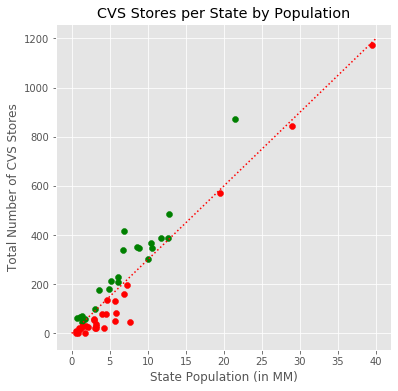

In [5]:
trendline = [[0,40000000/1e6],[0,40000000/33333]]
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(green_states['state_pop']/1e6, green_states['cvs_count'], c='g')
# for i, txt in enumerate(green_states.state):
#     ax.annotate(txt, (green_states['state_pop'][i], green_states['cvs_count'][i]), size=6, ha='left')

plt.scatter(red_states['state_pop']/1e6, red_states['cvs_count'], c='r')
# for i, txt in enumerate(red_states.state):
#     ax.annotate(txt, (red_states['state_pop'][i], red_states['cvs_count'][i]), size=6)

plt.plot(trendline[0],trendline[1], 'r:')

plt.xlabel('State Population (in MM)')
plt.ylabel('Total Number of CVS Stores')
plt.title('CVS Stores per State by Population')

Text(0.5, 1.0, 'Demand for CVS Stores per State Based on Population')

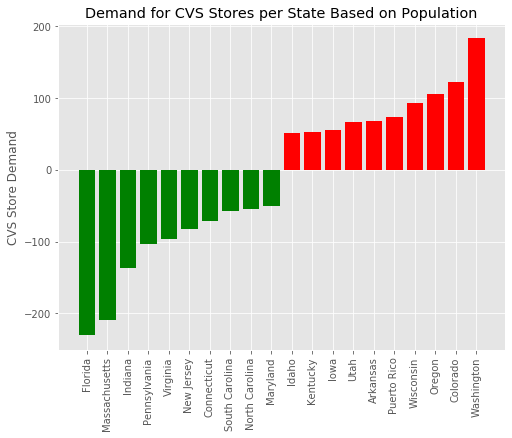

In [7]:
green_states_bar = green_states[0:10]
red_states_bar = red_states[-10:]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(green_states_bar['state'],green_states_bar['under_count'],color='g')
# ax.set_xticklabels(green_states['state'], rotation=90, ha='center')

ax.bar(red_states_bar['state'],red_states_bar['under_count'],color='r')
ax.set_xticklabels(pd.concat([green_states_bar['state'],red_states_bar['state']]), rotation=90, ha='center')

# plt.xlabel('State')
plt.ylabel('CVS Store Demand')
plt.title('Demand for CVS Stores per State Based on Population')

### CVS Stores by City

In [119]:
df_cities.head()

,state,city,city_pop,cvs_count,under,under_count
0,Wyoming,Cheyenne,64235,1,True,1.0
1,Wyoming,Casper,57931,1,True,1.0
2,Wisconsin,Racine,76760,2,True,0.0
3,Wisconsin,Appleton,74098,4,False,-2.0
4,Wisconsin,West Allis,59890,3,False,-1.0


Text(0.5, 1.0, 'CVS Stores per City by Population')

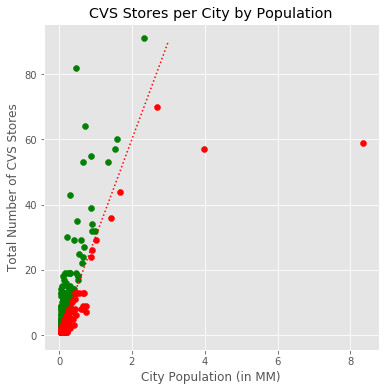

In [8]:
green_cities = df_cities[df_cities['under']==False].reset_index().sort_values('under_count',ascending=True)
red_cities = df_cities[df_cities['under']].reset_index().sort_values('under_count',ascending=True)

trendline = [[0,3000000/1e6],[0,3000000/33333]]
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(green_cities['city_pop']/1e6, green_cities['cvs_count'], c='g')
# for i, txt in enumerate(green_states.state):
#     ax.annotate(txt, (green_states['state_pop'][i], green_states['cvs_count'][i]), size=6, ha='left')

plt.scatter(red_cities['city_pop']/1e6, red_cities['cvs_count'], c='r')
# for i, txt in enumerate(red_states.state):
#     ax.annotate(txt, (red_states['state_pop'][i], red_states['cvs_count'][i]), size=6)

plt.plot(trendline[0],trendline[1], 'r:')

plt.xlabel('City Population (in MM)')
plt.ylabel('Total Number of CVS Stores')
plt.title('CVS Stores per City by Population')

Text(0.5, 1.0, 'Demand for CVS Stores per City Based on Population')

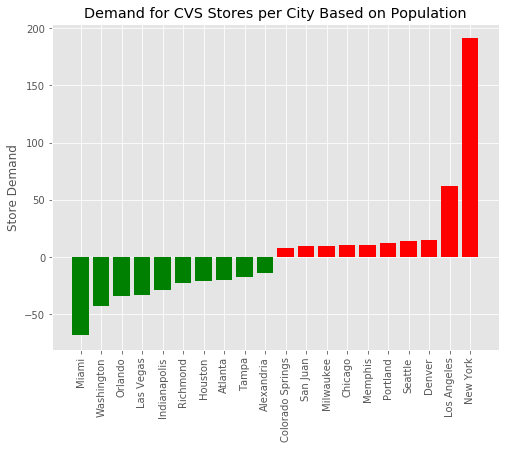

In [10]:
green_cities = df_cities.sort_values('under_count')[0:10]
red_cities = df_cities.sort_values('under_count')[-10:]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(green_cities['city'],green_cities['under_count'],color='g')
# ax.set_xticklabels(green_states['state'], rotation=90, ha='center')

ax.bar(red_cities['city'],red_cities['under_count'],color='r')
ax.set_xticklabels(pd.concat([green_cities['city'],red_cities['city']]), rotation=90, ha='center')

# plt.xlabel('City')
plt.ylabel('Store Demand')
plt.title('Demand for CVS Stores per City Based on Population')

### City and State Combined

In [145]:
df_cvs.head()

,state,state_pop,city_count,cvs_count_state,under_state,under_count_state,city,city_pop,cvs_count_city,under_city,under_count_city
0,Alabama,4903185,100,180,False,-33.0,Huntsville,200574.0,9.0,False,-3.0
1,Alabama,4903185,100,180,False,-33.0,Madison,51593.0,3.0,False,-1.0
2,Alabama,4903185,100,180,False,-33.0,Birmingham,209403.0,12.0,False,-6.0
3,Alabama,4903185,100,180,False,-33.0,Montgomery,198525.0,11.0,False,-5.0
4,Alabama,4903185,100,180,False,-33.0,Mobile,188720.0,13.0,False,-7.0


In [12]:
cvs_graph = df_cvs.groupby('state').agg({'under_count_state':'mean','under_count_city':'sum'})
cvs_graph = cvs_graph[cvs_graph['under_count_state'] > 0]
cvs_graph.sort_values('under_count_city',ascending=False)

,under_count_state,under_count_city
state,,
New York,12.0,168.0
Colorado,122.0,52.0
Washington,183.0,48.0
Oregon,105.0,27.0
Puerto Rico,74.0,20.0
Idaho,51.0,9.0
Arkansas,68.0,8.0
Alaska,18.0,7.0
New Mexico,38.0,7.0


Text(0.5, 1.0, 'Demand for Stores by State')

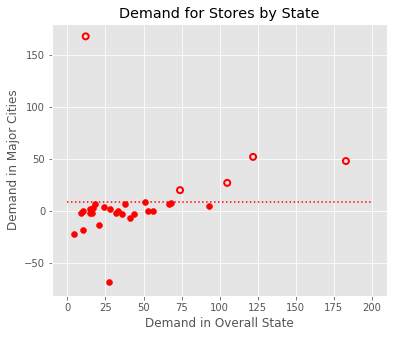

In [20]:
trendline = [[0,200],[9,9]]

circle_points = cvs_graph[cvs_graph['under_count_city'] > 9]
square_points = cvs_graph[cvs_graph['under_count_city'] <= 9]

plt.figure(figsize=(6, 5))
plt.scatter(circle_points['under_count_state'],circle_points['under_count_city'],facecolors='none', edgecolors='r', linewidths=2)
plt.scatter(square_points['under_count_state'],square_points['under_count_city'], color='r')
# plt.legend(['Higher demand inside of Cities','Higher demand outside of Cities'])
plt.plot(trendline[0],trendline[1],'r:')

plt.xlabel('Demand in Overall State')
plt.ylabel('Demand in Major Cities')
plt.title('Demand for Stores by State')

Text(0.5, 1.0, 'Below Average Stores by City and State')

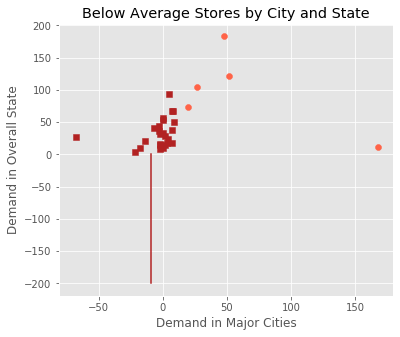

In [26]:
trendline = [[-9,-9],[0,-200]]

circle_points = cvs_graph[cvs_graph['under_count_city'] > 9]
square_points = cvs_graph[cvs_graph['under_count_city'] <= 9]

plt.figure(figsize=(6, 5))
plt.scatter(circle_points['under_count_city'],circle_points['under_count_state'],color='tomato')
plt.scatter(square_points['under_count_city'],square_points['under_count_state'],color='firebrick',marker='s')
# plt.legend(['Higher demand inside of Cities','Higher demand outside of Cities'])
plt.plot(trendline[0],trendline[1],color='firebrick')

plt.xlabel('Demand in Major Cities')
plt.ylabel('Demand in Overall State')
plt.title('Below Average Stores by City and State')

In [204]:
circle_points.sort_values('under_count_state',ascending=False)[0:4]

,under_count_state,under_count_city
state,,
Washington,183.0,48.0
Colorado,122.0,52.0
Oregon,105.0,27.0
Puerto Rico,74.0,20.0


In [205]:
square_points.sort_values('under_count_state',ascending=False)[0:6]

,under_count_state,under_count_city
state,,
Wisconsin,93.0,5.0
Arkansas,68.0,8.0
Utah,67.0,7.0
Iowa,56.0,0.0
Kentucky,53.0,0.0
Idaho,51.0,9.0


Text(0.5, 1.0, 'Top 10 States for Store Expansion')

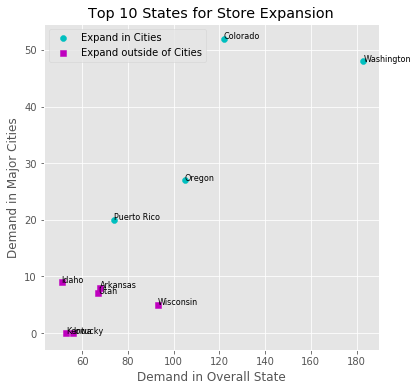

In [219]:
circle_points = cvs_graph[cvs_graph['under_count_city'] > 9].sort_values('under_count_state',ascending=False)[0:4]
square_points = cvs_graph[cvs_graph['under_count_city'] <= 9].sort_values('under_count_state',ascending=False)[0:6]

fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(circle_points['under_count_state'],circle_points['under_count_city'],color='c')
for i, txt in enumerate(circle_points.index):
    ax.annotate(txt, (circle_points['under_count_state'][i], circle_points['under_count_city'][i]), size=8)
    
plt.scatter(square_points['under_count_state'],square_points['under_count_city'],color='m',marker='s')
for i, txt in enumerate(square_points.index):
    ax.annotate(txt, (square_points['under_count_state'][i], square_points['under_count_city'][i]), size=8)
    
plt.legend(['Expand in Cities','Expand outside of Cities'])

plt.xlabel('Demand in Overall State')
plt.ylabel('Demand in Major Cities')
plt.title('Top 10 States for Store Expansion')

In [233]:
circle_points.index.tolist() + square_points.index.tolist()

['Washington',
 'Colorado',
 'Oregon',
 'Puerto Rico',
 'Wisconsin',
 'Arkansas',
 'Utah',
 'Iowa',
 'Kentucky',
 'Idaho']

Text(0.5, 1.0, 'Top 10 States for Expansion')

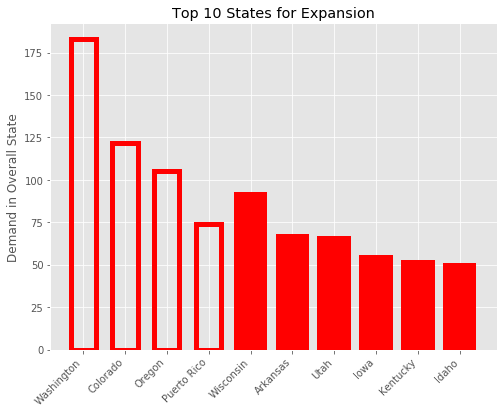

In [33]:
circle_points = cvs_graph[cvs_graph['under_count_city'] > 9].sort_values('under_count_state',ascending=False)[0:4]
square_points = cvs_graph[cvs_graph['under_count_city'] <= 9].sort_values('under_count_state',ascending=False)[0:6]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(circle_points.index,circle_points['under_count_state'],edgecolor='r',fill=False,linewidth=5,width=.6)

ax.bar(square_points.index,square_points['under_count_state'],color='r')
ax.set_xticklabels(circle_points.index.tolist() + square_points.index.tolist(), rotation=45, ha='right')

# plt.legend(['Expand inside of Cities','Expand outside of Cities'])
# plt.xlabel('State')
plt.ylabel('Demand in Overall State')
plt.title('Top 10 States for Expansion')

In [271]:
x = df_cvs[df_cvs['under_count_city']>3].sort_values(['under_count_state','under_count_city'],ascending=False)
x = x[['city','state','under_count_city','under_count_state']]
# df1.loc[df1.a==0,:]
x[(x.state=='Washington') | (x.state=='Colorado') | (x.state=='Puerto Rico')
     | (x.state=='Oregon')]

,city,state,under_count_city,under_count_state
652,Seattle,Washington,14.0,183.0
645,Tacoma,Washington,6.0,183.0
646,Spokane,Washington,5.0,183.0
643,Vancouver,Washington,4.0,183.0
210,Denver,Colorado,15.0,122.0
209,Colorado Springs,Colorado,8.0,122.0
208,Aurora,Colorado,6.0,122.0
516,Portland,Oregon,12.0,105.0
517,Salem,Oregon,4.0,105.0
519,Eugene,Oregon,4.0,105.0
